<a href="https://colab.research.google.com/github/Datbwoyyy/Egbo-Victor/blob/main/Anomaly_Detection_in_time_series_using_NAB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nab:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F110%2F240%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241006%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241006T223657Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9fbe5e9a965b249e7d2ee5bc6aaf93efdea1e8f25c103b4aa6e9ab04b903070ee1d7582cda086fc67ab47a78801d0b3603fe7e287d8d98ae71e4f791b6d4d3c5eb4953e062f7247f11a029a38f01610c160777d90fabd17191c9479bac02b7b0a17ca018439e160a8c4484c970411fe1af1548364fcfbff896f4c398133508dd7823e8fa301cdc3beba8b3fe52762afc1215c9681c2d93b7c22f8375a5597d9b4b061c692263c234c6a8550046f1ec9ce9e9a0b5eb5446e8d71a08a3952c54d97dcf70a7db609d2018e3eaeb2b7f968100379daa37ddf41ab22ffe58307ec5d2ff7e24db4f567d6a66181d7db58149e19a0ccb46b923ae8113780d5f090ab75d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1716443 bytes downloaded
Downloaded and uncompressed: nab
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nab/README.md
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_disk_write_bytes_c0d644.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/elb_request_count_8c0756.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_c6585a.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv
/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv
/kaggle/input/nab/realAWSCloud

## Data Preprocessing
Loading the dataset

* artificialNoAnomaly:
Synthetic data without anomalies.

* artificialWithAnomaly:
Synthetic data with anomalies.

* realAWSCloudwatch:
Real-time series data from AWS Cloudwatch.
* realAdExchange:
Time series data from ad exchanges.
* realKnownCause:
Real data where anomalies are known.
* realTraffic:
Traffic data from a website.
* realTweets:
Time series of tweet volumes.

In [3]:
import pandas as pd

# Load data (example for one file)
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv')
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_increase_spike_density.csv')
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv')
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_nojump.csv')
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_load_balancer_spikes.csv')
artificial_with_anomaly= pd.read_csv('/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv')

In [4]:
artificial_with_anomaly.isnull().sum()

,0
timestamp,0
value,0


In [5]:
artificial_with_anomaly

,timestamp,value
0,2014-04-01 00:00:00,18.090486
1,2014-04-01 00:05:00,20.359843
2,2014-04-01 00:10:00,21.105470
3,2014-04-01 00:15:00,21.151585
4,2014-04-01 00:20:00,18.137141
...,...,...
4027,2014-04-14 23:35:00,18.269290
4028,2014-04-14 23:40:00,19.087351
4029,2014-04-14 23:45:00,19.594689
4030,2014-04-14 23:50:00,19.767817


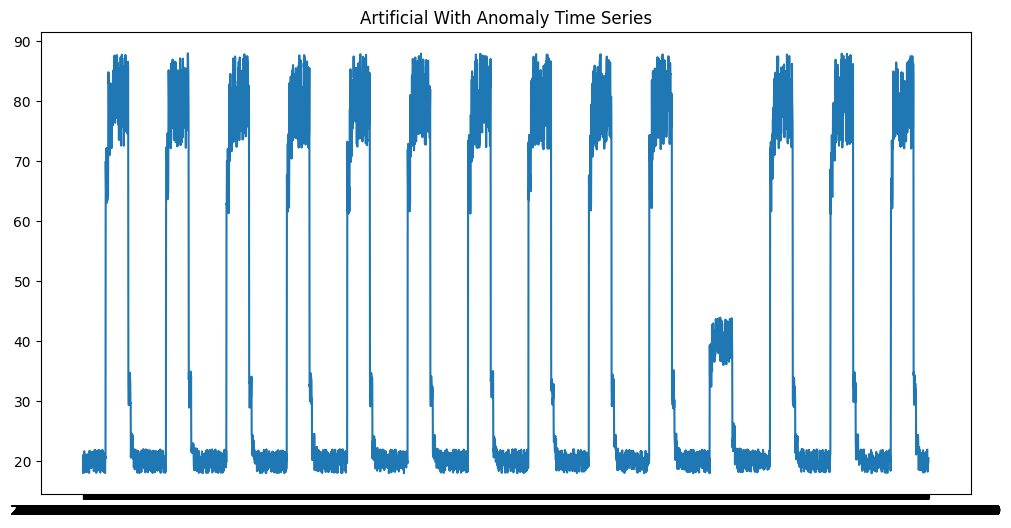

In [6]:
## Visualization

import matplotlib.pyplot as plt

# visualize time seriws
plt.figure(figsize=(12,6))
plt.plot(artificial_with_anomaly['timestamp'], artificial_with_anomaly['value'])
plt.title('Artificial With Anomaly Time Series')
plt.show()

### Anomaly Detection Models
There are different methods to detecting anomalies
1. Statistical Methods:
* Moving average with confidence intervals
* Z-score to detect points that deviate significantly from the mean.



In [7]:
import numpy as np

def z_score (series, threshold=3):
    mean = np.mean(series)
    std = np.std(series)
    z_scores = (series- mean) / std
    return np.where(np.abs(z_scores) > threshold, True , False)
anomalies = z_score(artificial_with_anomaly['value'])

#### Other Methods for detecting anomalies
2. Machine learning Approaches:
* isolation forest: useful for detecting outliers by isolating observations from others.
* Autoencoders(Deep Learning): Train an autoencoder neural network to learn the data's Normal behaviour.Large reconstruction errors signal anomalies.
* LSTM(Long short- Term Memory: A popular approach for time series analysis, LSTM can model the temp. dependencies and detect outliers.
3. Advanced Methods:
* Prophet by Facebook: A forecasting tool that can handle seasonality and outliers.
* Twitter's Anomaly Detection Package:
Built specifically for detecting anomalies in time series.

In [8]:
pip install prophet

In [9]:
## We will be using the abnormaly dataset for this step
import pandas as pd

# Load the dataset
data = artificial_with_anomaly

# Prepare the data for Prophet
data['timestamp']= pd.to_datetime(data['timestamp'])
df = data[['timestamp','value']].rename(columns= {'timestamp':'ds','value': 'y'})


### Fit Prophet to the Data
Prophet automatically captures seasonality and trend in the data.
### Making Predictions
Generating future predictions based on the existing dataset. Prophet predicts trends and seasonality , so anomalies are identified where there is significnt deviation from the expected behaviour

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcr7r6pbq/z7ih_4yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcr7r6pbq/_gkfxbgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43506', 'data', 'file=/tmp/tmpcr7r6pbq/z7ih_4yk.json', 'init=/tmp/tmpcr7r6pbq/_gkfxbgv.json', 'output', 'file=/tmp/tmpcr7r6pbq/prophet_modela_cinshl/prophet_model-20241006224519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:45:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-package

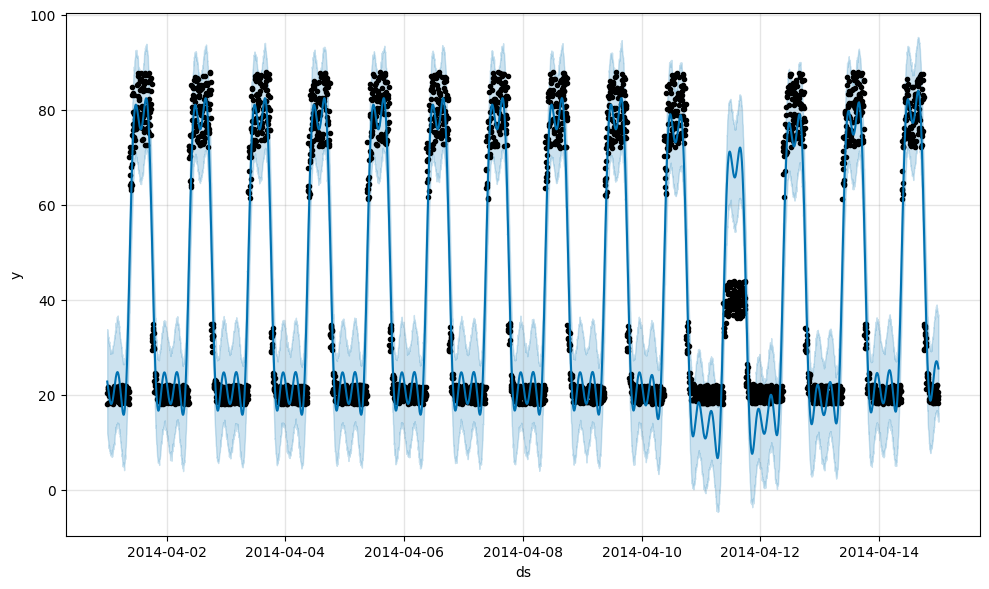

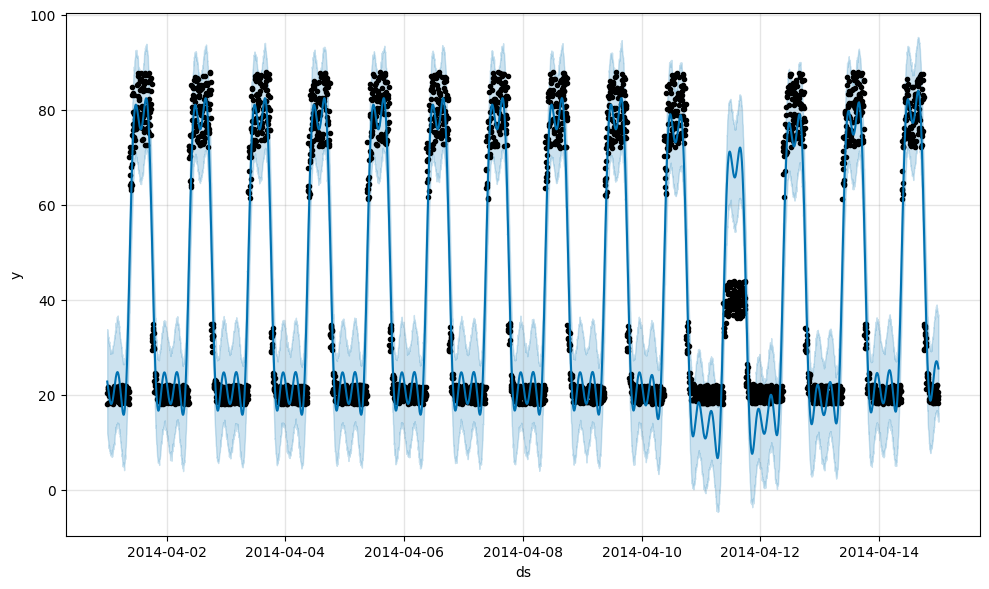

In [10]:
## Fitting the Prophet into the DATA
from prophet import Prophet

# initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df)

## Make future Predictions
future = model.make_future_dataframe(periods=0) # We are predicting only for the known periods.
forecast = model.predict(future)

# Visualize the forecast
model.plot(forecast)




#### Detect Anomalies
Anomalies can be detected by comparing the actual values (y) with the forecasted values (yhat). When the actual values deviate significantly (beyond some threshold) from the predicted values, they are flagged as anomalies.

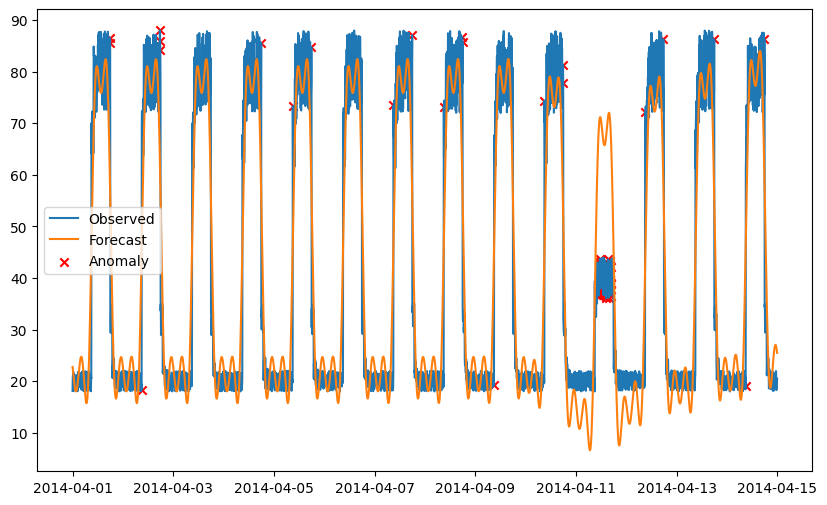

In [11]:
# Calculate residuals
df['yhat'] = forecast['yhat']
df['residual']= df['y'] - df['yhat']

# Set a Threshold for anomaly detection
threshold = 3* df['residual'].std() # 3 standard deviation from the mean
df['anomaly'] = df['residual'].apply(lambda x: 'anomaly' if abs(x) > threshold else 'normal')

# Visualize the anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['ds'], df['y'], label='Observed')
plt.plot(df['ds'], df['yhat'], label = 'Forecast')
plt.scatter(df[df['anomaly']=='anomaly']['ds'],df[df['anomaly']=='anomaly']['y'],color='red', label= 'Anomaly', marker='x')
plt.legend()
plt.show()

In [12]:
## Evaluation Metrics: To evaluate this anomaly detection, we can use Precision,Recall, F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming we have ground truth  in the dataset in a column 'label'(1 for anomaly, 0 for normal)
df['true_label']= df['residual'].apply(lambda x: 1 if abs(x) > threshold else 0) # ground truth label from the dataset

# Convert the detected anomalies to binary (1 for anomaly, 0 for normal)
df['detected_anomaly'] = df['anomaly'].apply(lambda x: 1 if x=='anomaly' else 0 )

# Calculate evaluation metrics
precision = precision_score(df['true_label'], df['detected_anomaly'])
recall = recall_score(df['true_label'], df['detected_anomaly'])
f1 = f1_score(df['true_label'],df['detected_anomaly'])

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score:{f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-score:1.00


### The Above result means
Precision: 1.00 - Every Point flagged as  an amomaly is indeed one (No false positives so: True positives)

Recall: 1.00: The model has correctly identified all actual anomalies (No False negatives)when it says it is 0 is is actually 0 so the observed points where there is no abnormally is actually void of abnormally.

F1-score:1.00- This Score shows the balance betwwen precision and Recall is perfect

Next: We Visualize the confusion matrix

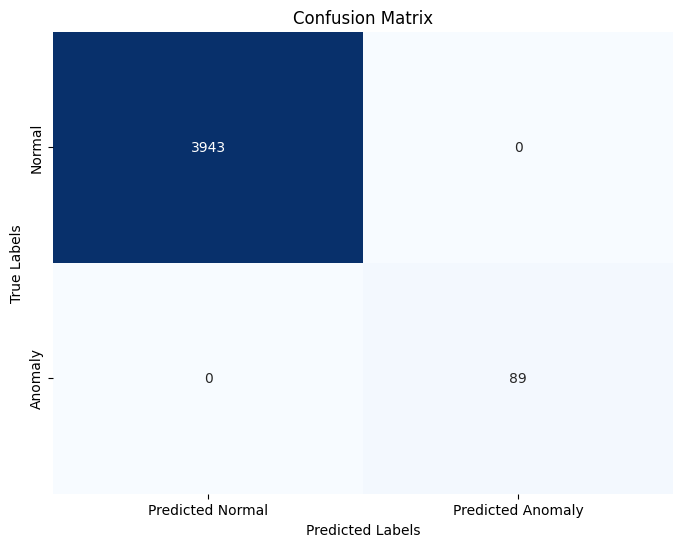

In [13]:
## CONFUSION MATRIX
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm= confusion_matrix(df['true_label'], df['detected_anomaly'])

# Create a DataFrame for easier visialization
cm_df = pd.DataFrame(cm, index=['Normal', 'Anomaly'], columns=['Predicted Normal', 'Predicted Anomaly'])

# Plotting the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [18]:
!pip install streamlit pandas matplotlib scikit-learn



2024-10-06 22:51:31.986 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.677 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-06 22:51:32.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 22:51:32.715 Thread 'MainThread': mi

False

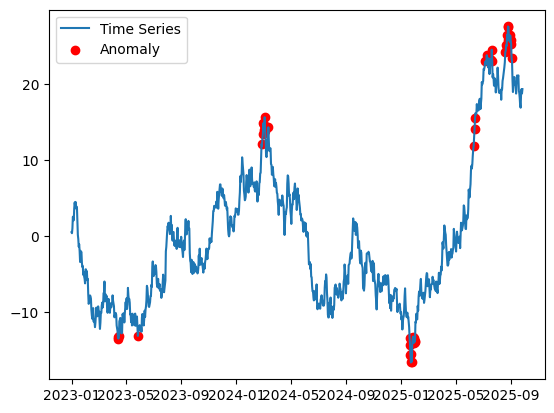

In [15]:
# anomaly_detection_app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Title and description
st.title('Anomaly Detection with NAB Dataset')
st.write("""
This web app uses an Isolation Forest to detect anomalies in time series data from the NAB dataset.
""")

# Sidebar for dataset selection
dataset_choice = st.sidebar.selectbox(
    'Select a NAB dataset:',
    ('artificialNoAnomaly', 'artificialWithAnomaly', 'realAWSCloudwatch',
     'realAdExchange', 'realKnownCause', 'realTraffic', 'realTweets')
)

# Load dataset based on choice (mock loading - replace with real dataset loading)
@st.cache
def load_data(dataset_name):
    # Replace this with actual data loading code for your dataset
    np.random.seed(42)
    data = np.cumsum(np.random.randn(1000))  # Random walk to simulate time series
    return pd.DataFrame({'timestamp': pd.date_range(start='1/1/2023', periods=1000), 'value': data})

data = load_data(dataset_choice)

# Display dataset
st.subheader(f'{dataset_choice} Dataset')
st.line_chart(data.set_index('timestamp')['value'])

# Sidebar options for anomaly detection
contamination = st.sidebar.slider('Contamination Level', 0.01, 0.1, 0.05)
n_estimators = st.sidebar.slider('Number of Trees (n_estimators)', 50, 200, 100)

# Isolation Forest model
model = IsolationForest(n_estimators=n_estimators, contamination=contamination)
data['anomaly'] = model.fit_predict(data[['value']])

# Display anomalies
st.subheader('Anomaly Detection Results')

fig, ax = plt.subplots()
ax.plot(data['timestamp'], data['value'], label='Time Series')
ax.scatter(data[data['anomaly'] == -1]['timestamp'],
           data[data['anomaly'] == -1]['value'], color='red', label='Anomaly')
ax.legend()

st.pyplot(fig)

# Download button for results
st.subheader('Download Anomaly Detection Results')
st.write("You can download the dataset with detected anomalies.")
csv = data.to_csv(index=False)
st.download_button(label="Download CSV", data=csv, file_name='anomaly_detection_results.csv', mime='text/csv')


In [17]:
!streamlit run anomaly_detection_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: anomaly_detection_app.py


In [19]:
!pip install streamlit pyngrok


In [37]:
# Step 2: Write your Streamlit app
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

st.title('Anomaly Detection with NAB Dataset')
st.write("""
This web app uses an Isolation Forest to detect anomalies in time series data from the NAB dataset.
""")

dataset_choice = st.sidebar.selectbox(
    'Select a NAB dataset:',
    ('artificialNoAnomaly', 'artificialWithAnomaly', 'realAWSCloudwatch',
     'realAdExchange', 'realKnownCause', 'realTraffic', 'realTweets')
)

@st.cache_data
def load_data(dataset_name):
    np.random.seed(42)
    data = np.cumsum(np.random.randn(1000))  # Mock data
    return pd.DataFrame({'timestamp': pd.date_range(start='1/1/2023', periods=1000), 'value': data})

data = load_data(dataset_choice)
st.subheader(f'{dataset_choice} Dataset')
st.line_chart(data.set_index('timestamp')['value'])

contamination = st.sidebar.slider('Contamination Level', 0.01, 0.1, 0.05)
n_estimators = st.sidebar.slider('Number of Trees (n_estimators)', 50, 200, 100)

model = IsolationForest(n_estimators=n_estimators, contamination=contamination)
data['anomaly'] = model.fit_predict(data[['value']])

st.subheader('Anomaly Detection Results')

fig, ax = plt.subplots()
ax.plot(data['timestamp'], data['value'], label='Time Series')
ax.scatter(data[data['anomaly'] == -1]['timestamp'],
           data[data['anomaly'] == -1]['value'], color='red', label='Anomaly')
ax.legend()
st.pyplot(fig)

st.subheader('Download Anomaly Detection Results')
csv = data.to_csv(index=False)
st.download_button(label="Download CSV", data=csv, file_name='anomaly_detection_results.csv', mime='text/csv')



Overwriting app.py


In [38]:
# Step 3: Run Streamlit in the background
import subprocess

streamlit_process = subprocess.Popen(['streamlit', 'run', 'app.py'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)


In [39]:

# Step 4: Authenticate with Ngrok
from pyngrok import ngrok

ngrok.set_auth_token("2n5IQimaq4zqPIfiULVK06jWAef_QYx1vJVjnot4F12hFPwF")


In [41]:
# Step 4: Authenticate and start Ngrok tunnel
ngrok.set_auth_token("2n5IQimaq4zqPIfiULVK06jWAef_QYx1vJVjnot4F12hFPwF")
public_url = ngrok.connect(8501, "http")  # Corrected Ngrok connection
print('Public URL:', public_url)

Public URL: NgrokTunnel: "https://dc00-34-74-229-151.ngrok-free.app" -> "http://localhost:8501"
